In [2]:
import pandas as pd 
from datetime import datetime

df = pd.read_csv('tweetdata2.csv')

df['Timestamp'] = df['Timestamp'].astype(str)

df["Timestamp"] = df["Timestamp"].str[:-5]

df["Timestamp"] = df["Timestamp"].str.replace("T"," ")

df['Timestamp'] = df['Timestamp'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

d1 = datetime.strptime("2015-08-10 19:33:27.653", "%Y-%m-%d %H:%M:%S.%f")
tweet_time = datetime.strptime("2022-05-12 23:41:34.0", "%Y-%m-%d %H:%M:%S.%f")

times = []

for i in df['Timestamp']: 
    times.append(i-tweet_time)
    
df['TimeDifference'] = times

# hours = []

# for i in df['TimeDifference']: 
#     hours.append(i.total_seconds() / 3600)
    
# df['TimeDifference'] = hours

df


,Text,AuthorID,Timestamp,TimeDifference
0,@DanRather Do you think Ukraine is Free and a ...,1950853916,2022-05-17 04:20:05,4 days 04:38:31
1,@DanRather &gt;freedom\n&gt;democracy\nPick one,1516648478189158400,2022-05-17 00:29:44,4 days 00:48:10
2,@DanRather Being Pro-America has nothing to do...,25728613,2022-05-16 21:30:59,3 days 21:49:25
3,@DanRather If you believe in censorship then y...,1925291478,2022-05-16 20:06:24,3 days 20:24:50
4,@DanRather U know the truth Mr. Rather. I’m no...,4901835894,2022-05-16 17:42:57,3 days 18:01:23
...,...,...,...,...
4367,"@DanRather And you are telling the world , is ...",753862173475082241,2022-05-12 23:42:47,0 days 00:01:13
4368,@DanRather Please enjoy the return of the Poli...,25669608,2022-05-12 23:42:38,0 days 00:01:04
4369,@DanRather https://t.co/hEAW99QujT,1131767503934377985,2022-05-12 23:42:22,0 days 00:00:48
4370,@DanRather It might be a small indicator that ...,24086519,2022-05-12 23:42:20,0 days 00:00:46


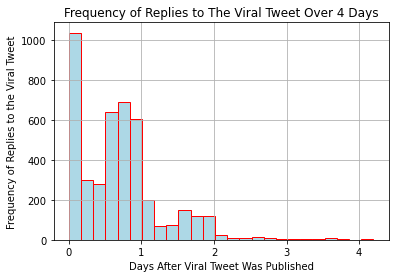

In [119]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt


df = pd.read_csv('tweetdata2.csv')

df['Timestamp'] = df['Timestamp'].astype(str)

df["Timestamp"] = df["Timestamp"].str[:-5]

df["Timestamp"] = df["Timestamp"].str.replace("T"," ")

df['Timestamp'] = df['Timestamp'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

d1 = datetime.strptime("2015-08-10 19:33:27.653", "%Y-%m-%d %H:%M:%S.%f")
tweet_time = datetime.strptime("2022-05-12 23:41:34.0", "%Y-%m-%d %H:%M:%S.%f")

times = []

for i in df['Timestamp']: 
    times.append(i-tweet_time)
    
df['TimeDifference'] = times

hours = []

for i in df['TimeDifference']: 
    hours.append(i.total_seconds() / 86400)
    
df['TimeDifference'] = hours

# bin_edges = [0, 24, 48, 72, 96]

plt.hist(df['TimeDifference'], color = "lightblue", ec="red", lw=1,bins = 25)

plt.grid(True)

plt.title("Frequency of Replies to The Viral Tweet Over 4 Days")

plt.xlabel('Days After Viral Tweet Was Published')

plt.ylabel('Frequency of Replies to the Viral Tweet')

plt.show()



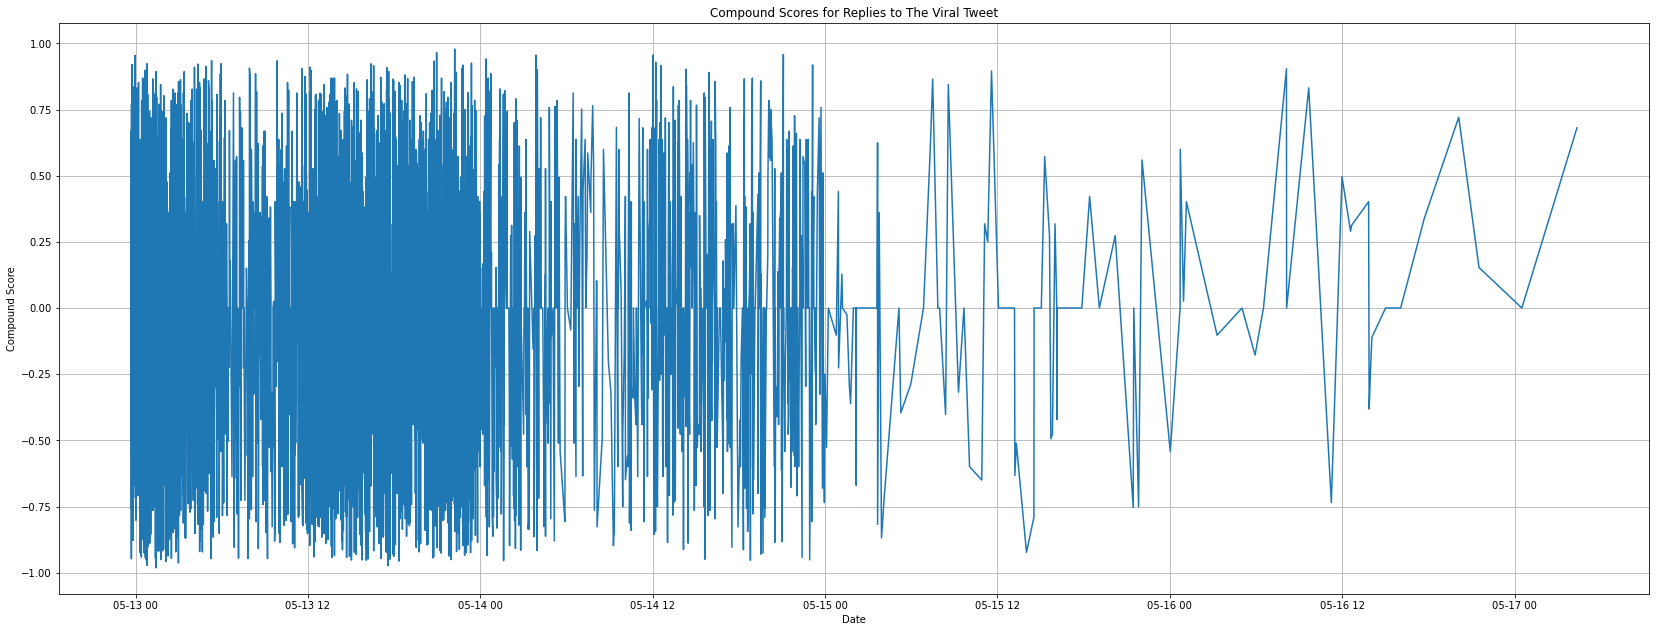

In [64]:
import pandas as pd 
from datetime import datetime
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
stopwords = nltk.corpus.stopwords.words('english') 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter



df = pd.read_csv('tweetdata2.csv')

df['Timestamp'] = df['Timestamp'].astype(str)

df["Timestamp"] = df["Timestamp"].str[:-5]

df["Timestamp"] = df["Timestamp"].str.replace("T"," ")

df['Timestamp'] = df['Timestamp'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

d1 = datetime.strptime("2015-08-10 19:33:27.653", "%Y-%m-%d %H:%M:%S.%f")
tweet_time = datetime.strptime("2022-05-12 23:41:34.0", "%Y-%m-%d %H:%M:%S.%f")

times = []

for i in df['Timestamp']: 
    times.append(i-tweet_time)
    
df['TimeDifference'] = times

hours = []

for i in df['TimeDifference']: 
    hours.append(i.total_seconds() / 3600)
    
df['TimeDifference'] = hours

df["Text"]= df["Text"].str.lower()


df["Text"] = df["Text"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Text'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

x1 = df['Timestamp'].values
y1 = df['compound'].values

plt.subplots(figsize=(28.5, 10.5))

plt.plot(x1,y1)

plt.grid(True)

plt.title("Compound Scores for Replies to The Viral Tweet")

plt.xlabel("Date")

plt.ylabel("Compound Score")



plt.show()


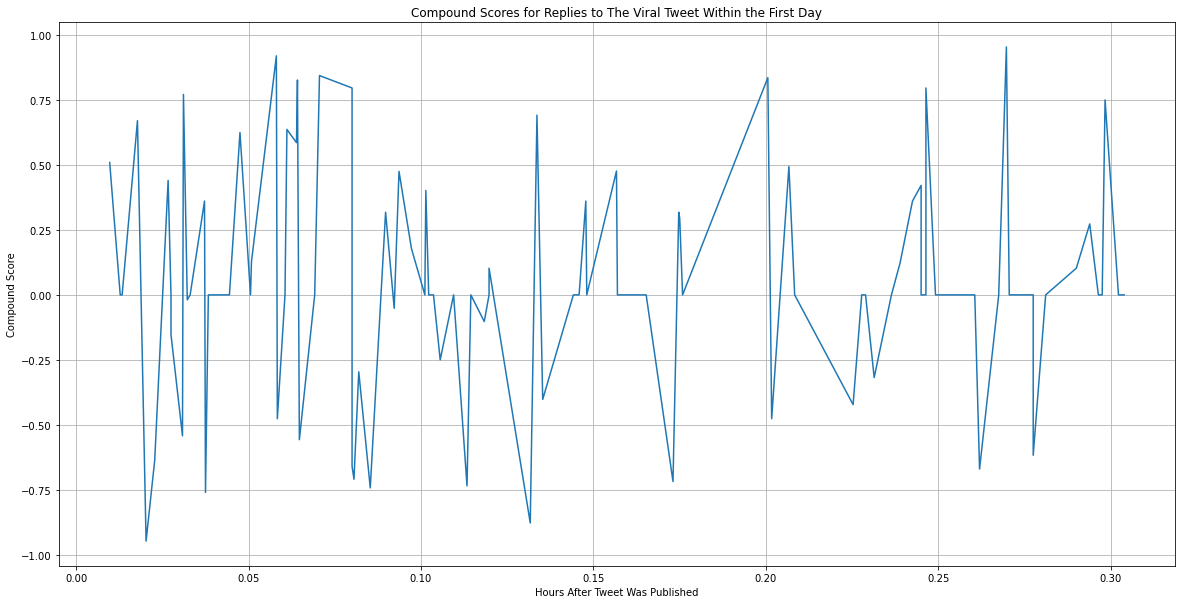

24


In [94]:
import pandas as pd 
from datetime import datetime
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
stopwords = nltk.corpus.stopwords.words('english') 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter

df = pd.read_csv('tweetdata2.csv')

df['Timestamp'] = df['Timestamp'].astype(str)

df["Timestamp"] = df["Timestamp"].str[:-5]

df["Timestamp"] = df["Timestamp"].str.replace("T"," ")

df['Timestamp'] = df['Timestamp'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

d1 = datetime.strptime("2015-08-10 19:33:27.653", "%Y-%m-%d %H:%M:%S.%f")
tweet_time = datetime.strptime("2022-05-12 23:41:34.0", "%Y-%m-%d %H:%M:%S.%f")

times = []

for i in df['Timestamp']: 
    times.append(i-tweet_time)
    
df['TimeDifference'] = times

hours = []

for i in df['TimeDifference']: 
    hours.append(i.total_seconds() / 3600)
    
df['TimeDifference'] = hours

df = df[df['Timestamp'].between('2022-05-12','2022-05-13')]

df["Text"]= df["Text"].str.lower()


df["Text"] = df["Text"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Text'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

x1 = df['TimeDifference'].values
y1 = df['compound'].values

plt.subplots(figsize=(20, 10))

plt.plot(x1,y1)

plt.grid(True)

plt.title("Compound Scores for Replies to The Viral Tweet Within the First Day")

plt.xlabel("Hours After Tweet Was Published")

plt.ylabel("Compound Score")



plt.show()



print(len(df[df['comp_score'].str.contains('neg')]))


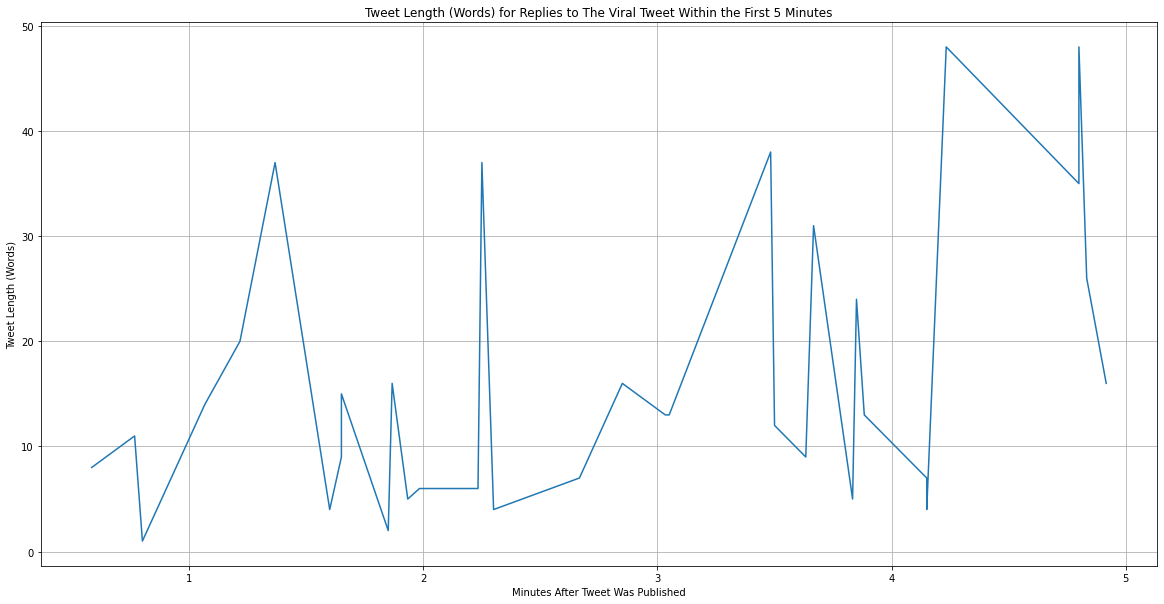

In [96]:
#Length of Replies Graph 
import pandas as pd 
from datetime import datetime
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
stopwords = nltk.corpus.stopwords.words('english') 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter

df = pd.read_csv('tweetdata2.csv')

df['Timestamp'] = df['Timestamp'].astype(str)

df["Timestamp"] = df["Timestamp"].str[:-5]

df["Timestamp"] = df["Timestamp"].str.replace("T"," ")

df['Timestamp'] = df['Timestamp'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

d1 = datetime.strptime("2015-08-10 19:33:27.653", "%Y-%m-%d %H:%M:%S.%f")
tweet_time = datetime.strptime("2022-05-12 23:41:34.0", "%Y-%m-%d %H:%M:%S.%f")

times = []

for i in df['Timestamp']: 
    times.append(i-tweet_time)
    
df['TimeDifference'] = times

hours = []

for i in df['TimeDifference']: 
    hours.append(i.total_seconds() / 60)
    
df['TimeDifference'] = hours


df['Text'] = df['Text'].str.split(n=1).str[1]


df['#Text'] = df['Text'].apply(lambda n: len(n.split()))


df = df[df['Timestamp'].between('2022-05-12 23:42:09','2022-05-12 23:46:40')]

x1 = df['TimeDifference'].values
y1 = df['#Text'].values

plt.subplots(figsize=(20, 10))

plt.plot(x1,y1)

plt.grid(True)

plt.title("Tweet Length (Words) for Replies to The Viral Tweet Within the First 5 Minutes")

plt.xlabel("Minutes After Tweet Was Published")

plt.ylabel("Tweet Length (Words)")


plt.show()



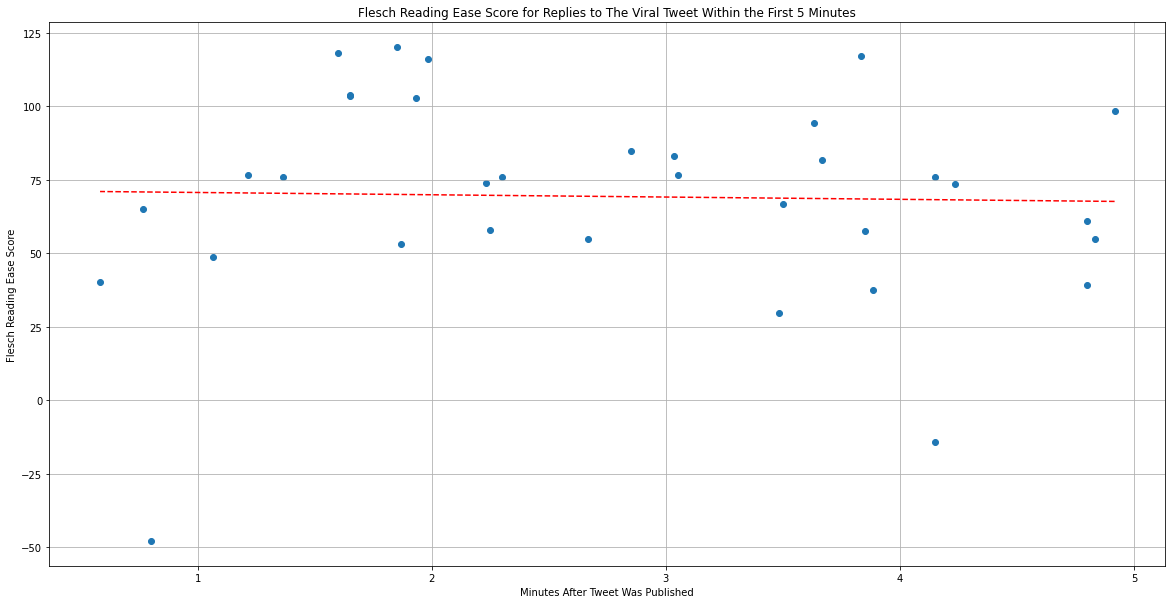

In [86]:
#Readability Scores 
import pandas as pd 
from datetime import datetime
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
stopwords = nltk.corpus.stopwords.words('english') 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter

from nltk.tokenize import sent_tokenize

df = pd.read_csv('tweetdata2.csv')

df['Timestamp'] = df['Timestamp'].astype(str)

df["Timestamp"] = df["Timestamp"].str[:-5]

df["Timestamp"] = df["Timestamp"].str.replace("T"," ")

df['Timestamp'] = df['Timestamp'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

d1 = datetime.strptime("2015-08-10 19:33:27.653", "%Y-%m-%d %H:%M:%S.%f")
tweet_time = datetime.strptime("2022-05-12 23:41:34.0", "%Y-%m-%d %H:%M:%S.%f")

times = []

for i in df['Timestamp']: 
    times.append(i-tweet_time)
    
df['TimeDifference'] = times

hours = []

for i in df['TimeDifference']: 
    hours.append(i.total_seconds() / 60)
    
df['TimeDifference'] = hours

df['Text'] = df['Text'].str.split(n=1).str[1]

Sentences_Count = []

for i in df['Text']: 
    
    Sentences_Count.append(len(sent_tokenize(i)))
    
df['Sentences_Count'] = Sentences_Count 

def syllable_count(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

Syllables_Count = []

for i in df['Text']: 
    
    Syllables_Count.append(syllable_count(i))
    
df['Syllables_Count'] = Syllables_Count 

df['#Text'] = df['Text'].apply(lambda n: len(n.split()))


Flesch_Score = []



score = 206.835 - 1.015 * (float(8) / 1) - 84.6 * (15 / float(8))

num_words = df['#Text']

num_sents = df['Sentences_Count']

num_syllables = df['Syllables_Count']


for i in range(len(num_words)): 
    Flesch_Score.append(206.835 - 1.015 * (float(num_words[i]) / num_sents[i]) - 84.6 * (num_syllables[i] / float(num_words[i])))

df['Flesch_Score'] = Flesch_Score

df = df[df['Timestamp'].between('2022-05-12 23:42:09','2022-05-12 23:46:40')]

x = df['TimeDifference'].values
y = df['Flesch_Score'].values

plt.subplots(figsize=(20, 10))

plt.scatter(x,y)

plt.grid(True)

plt.title("Flesch Reading Ease Score for Replies to The Viral Tweet Within the First 5 Minutes")

plt.xlabel("Minutes After Tweet Was Published")

plt.ylabel("Flesch Reading Ease Score")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()


In [41]:
#Find Number of Retweets Between Days for Warlockyone 

import pandas as pd 
from datetime import datetime

df = pd.read_csv('Warlockyone.csv')

df['Timestamp'] = df['Timestamp'].astype(str)

df["Timestamp"] = df["Timestamp"].str[:-5]

df["Timestamp"] = df["Timestamp"].str.replace("T"," ")

df['Timestamp'] = df['Timestamp'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

df = df[df['Timestamp'].between('2022-05-05','2022-05-06')]

retweets = 0

posts = 0 

for i in df['Text']: 
    if(i[:2] == 'RT'): 
        retweets +=1
    else: 
        posts +=1
        
        
print(retweets)

print(posts)
        


53
56


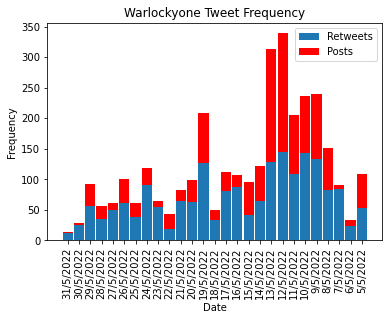

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




df = pd.read_csv('Warlocky.csv')

fig = plt.figure()

x1 = df['Timestamp']

z1 = df['Retweets']
w1 = df['Posts']


plt.title("Warlockyone Tweet Frequency")

plt.xlabel("Date")

plt.ylabel("Frequency")

plt.xticks(rotation=90)



plt.bar(x1,z1,0.9,label="Retweets")
plt.bar(x1,w1,0.9,bottom=z1,label="Posts", color='red')
plt.legend()
plt.show()

In [114]:
#Find Number of Retweets Between Days for Warlockyone 

import pandas as pd 
from datetime import datetime

df = pd.read_csv('SaltyProfessor.csv')

df['Timestamp'] = df['Timestamp'].astype(str)

df["Timestamp"] = df["Timestamp"].str[:-5]

df["Timestamp"] = df["Timestamp"].str.replace("T"," ")

df['Timestamp'] = df['Timestamp'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

df = df[df['Timestamp'].between('2022-05-05','2022-05-06')]

retweets = 0

posts = 0 

for i in df['Text']: 
    if(i[:2] == 'RT'): 
        retweets +=1
    else: 
        posts +=1
        
        
print(retweets)

print(posts)
        

0
3


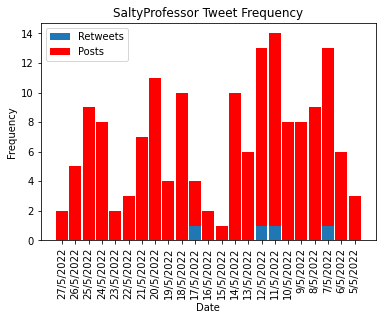

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




df = pd.read_csv('SaltProf2.csv')

fig = plt.figure()

x1 = df['Timestamp']
y1= df['Frequency']
z1 = df['Retweets']
w1 = df['Posts']


plt.title("SaltyProfessor Tweet Frequency")

plt.xlabel("Date")

plt.ylabel("Frequency")

plt.xticks(rotation=90)



plt.bar(x1,z1,0.9,label="Retweets")
plt.bar(x1,w1,0.9,bottom=z1,label="Posts", color='red')
plt.legend()
plt.show()

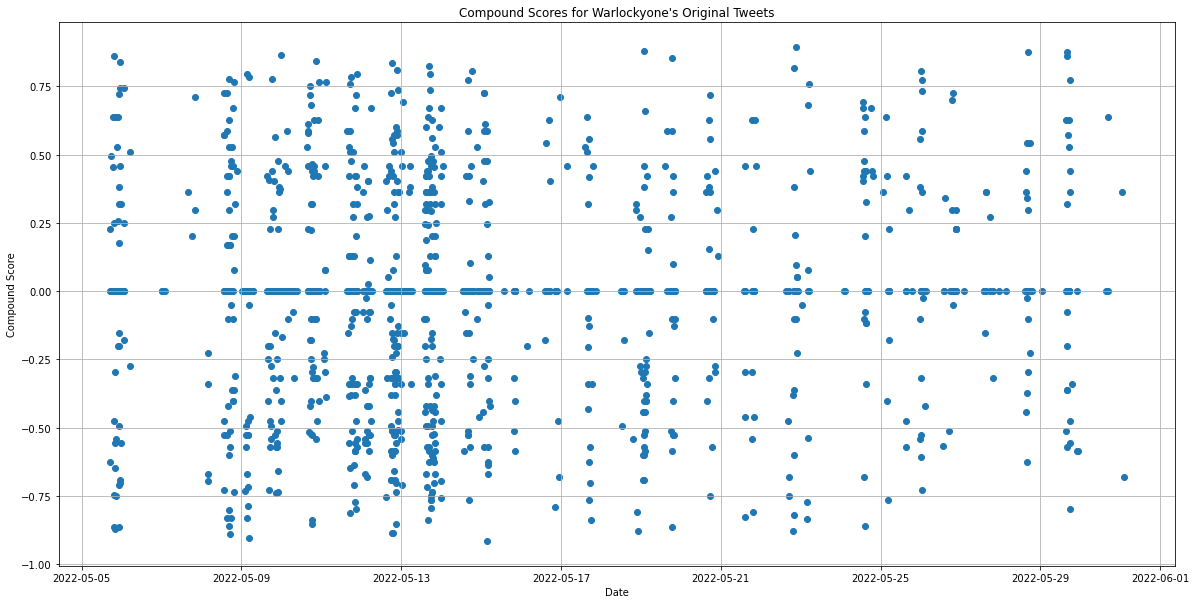

-0.028186326070623602

In [110]:
#Compound Scores for Warlockyone Tweets Not Retweets  

import pandas as pd 
from datetime import datetime
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
stopwords = nltk.corpus.stopwords.words('english') 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter

df = pd.read_csv('Warlockyone.csv')

df['Timestamp'] = df['Timestamp'].astype(str)

df["Timestamp"] = df["Timestamp"].str[:-5]

df["Timestamp"] = df["Timestamp"].str.replace("T"," ")

df['Timestamp'] = df['Timestamp'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

d1 = datetime.strptime("2015-08-10 19:33:27.653", "%Y-%m-%d %H:%M:%S.%f")
tweet_time = datetime.strptime("2022-05-12 23:41:34.0", "%Y-%m-%d %H:%M:%S.%f")

posts = []

for i in df['Text']: 
    if(i[:2] != 'RT'): 
        posts.append(i)
    


df = df[~df.Text.str.contains("RT")]

df["Text"]= df["Text"].str.lower()


df["Text"] = df["Text"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Text'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

x1 = df['Timestamp'].values
y1 = df['compound'].values

plt.subplots(figsize=(20, 10))

plt.scatter(x1,y1)

plt.grid(True)

plt.title("Compound Scores for Warlockyone's Original Tweets")

plt.xlabel("Date")

plt.ylabel("Compound Score")



plt.show()

df["compound"].mean()

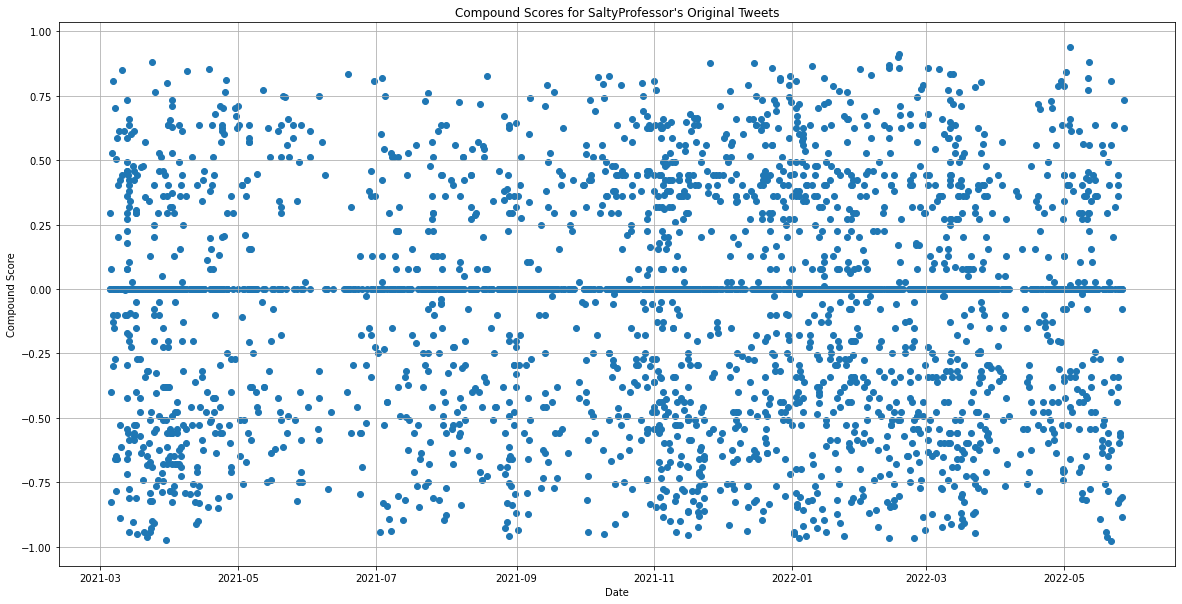

-0.055480370603015125

In [109]:
#Compound Scores for SaltyProfessor Tweets Not Retweets  

import pandas as pd 
from datetime import datetime
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
stopwords = nltk.corpus.stopwords.words('english') 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter

df = pd.read_csv('SaltyProfessor.csv')

df['Timestamp'] = df['Timestamp'].astype(str)

df["Timestamp"] = df["Timestamp"].str[:-5]

df["Timestamp"] = df["Timestamp"].str.replace("T"," ")

df['Timestamp'] = df['Timestamp'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

d1 = datetime.strptime("2015-08-10 19:33:27.653", "%Y-%m-%d %H:%M:%S.%f")
tweet_time = datetime.strptime("2022-05-12 23:41:34.0", "%Y-%m-%d %H:%M:%S.%f")

posts = []

for i in df['Text']: 
    if(i[:2] != 'RT'): 
        posts.append(i)
    


df = df[~df.Text.str.contains("RT")]

df["Text"]= df["Text"].str.lower()


df["Text"] = df["Text"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Text'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

x1 = df['Timestamp'].values
y1 = df['compound'].values

plt.subplots(figsize=(20, 10))

plt.scatter(x1,y1)

plt.grid(True)

plt.title("Compound Scores for SaltyProfessor's Original Tweets")

plt.xlabel("Date")

plt.ylabel("Compound Score")



plt.show()

df["compound"].mean()

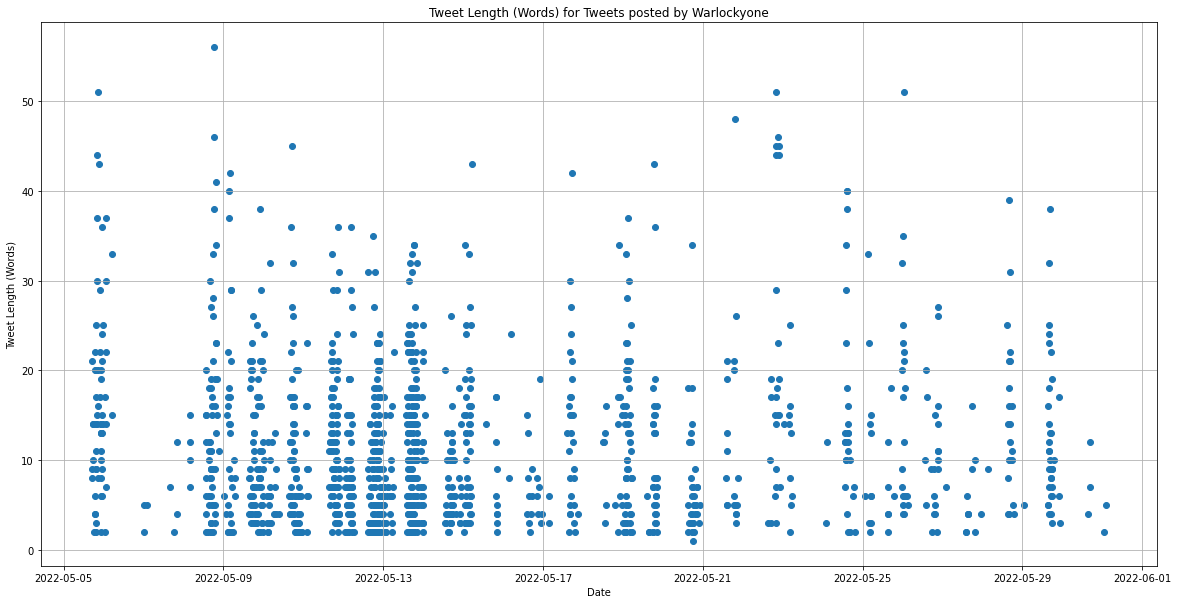

11.545454545454545

In [3]:
#Tweet Length for Warlockyone Tweets 
import pandas as pd 
from datetime import datetime
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
stopwords = nltk.corpus.stopwords.words('english') 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter

df = pd.read_csv('Warlockyone.csv')

df['Timestamp'] = df['Timestamp'].astype(str)

df["Timestamp"] = df["Timestamp"].str[:-5]

df["Timestamp"] = df["Timestamp"].str.replace("T"," ")

df['Timestamp'] = df['Timestamp'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

d1 = datetime.strptime("2015-08-10 19:33:27.653", "%Y-%m-%d %H:%M:%S.%f")
tweet_time = datetime.strptime("2022-05-12 23:41:34.0", "%Y-%m-%d %H:%M:%S.%f")

posts = []

for i in df['Text']: 
    if(i[:2] != 'RT'): 
        posts.append(i)
    


df = df[~df.Text.str.contains("RT")]

df['#Text'] = df['Text'].apply(lambda n: len(n.split()))



x1 = df['Timestamp'].values
y1 = df['#Text'].values

plt.subplots(figsize=(20, 10))

plt.scatter(x1,y1)

plt.grid(True)

plt.title("Tweet Length (Words) for Tweets posted by Warlockyone")

plt.xlabel("Date")

plt.ylabel("Tweet Length (Words)")


plt.show()

df["#Text"].mean()

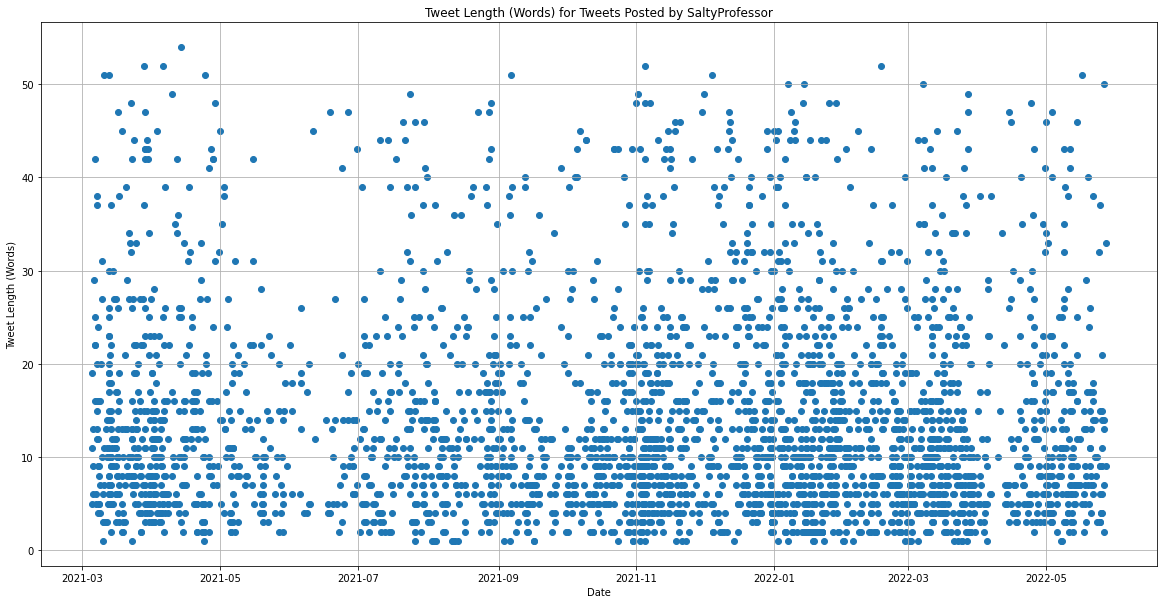

13.988379396984925

In [4]:
#Tweet Length for SaltyProfessor Tweets 
import pandas as pd 
from datetime import datetime
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
stopwords = nltk.corpus.stopwords.words('english') 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter

df = pd.read_csv('SaltyProfessor.csv')

df['Timestamp'] = df['Timestamp'].astype(str)

df["Timestamp"] = df["Timestamp"].str[:-5]

df["Timestamp"] = df["Timestamp"].str.replace("T"," ")

df['Timestamp'] = df['Timestamp'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

d1 = datetime.strptime("2015-08-10 19:33:27.653", "%Y-%m-%d %H:%M:%S.%f")
tweet_time = datetime.strptime("2022-05-12 23:41:34.0", "%Y-%m-%d %H:%M:%S.%f")

posts = []

for i in df['Text']: 
    if(i[:2] != 'RT'): 
        posts.append(i)
    


df = df[~df.Text.str.contains("RT")]

df['#Text'] = df['Text'].apply(lambda n: len(n.split()))



x1 = df['Timestamp'].values
y1 = df['#Text'].values

plt.subplots(figsize=(20, 10))

plt.scatter(x1,y1)

plt.grid(True)

plt.title("Tweet Length (Words) for Tweets Posted by SaltyProfessor")

plt.xlabel("Date")

plt.ylabel("Tweet Length (Words)")


plt.show()

df["#Text"].mean()

In [32]:
#Create new file for Warlockyone Tweets without retweets  
import pandas as pd 
from datetime import datetime
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
stopwords = nltk.corpus.stopwords.words('english') 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter

df = pd.read_csv('Warlockyone.csv')

df['Timestamp'] = df['Timestamp'].astype(str)

df["Timestamp"] = df["Timestamp"].str[:-5]

df["Timestamp"] = df["Timestamp"].str.replace("T"," ")

df['Timestamp'] = df['Timestamp'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

d1 = datetime.strptime("2015-08-10 19:33:27.653", "%Y-%m-%d %H:%M:%S.%f")
tweet_time = datetime.strptime("2022-05-12 23:41:34.0", "%Y-%m-%d %H:%M:%S.%f")

posts = []

for i in df['Text']: 
    if(i[:2] != 'RT'): 
        posts.append(i)
    


df = df[~df.Text.str.contains("RT")]

df.to_csv('warlockynew.csv', index=False)

,Text,AuthorID,ID,Timestamp
6,@DrKarlynB What the hell ?,1059197545,1531461410311573504,2022-05-31 02:23:48
9,@chasbottom privilege,1059197545,1531439821549453312,2022-05-31 00:58:00
27,"@DrProudman *your\n\nJust don't lie, that's all",1059197545,1531318736510144514,2022-05-30 16:56:51
33,@PeterMcCormack I sure hope that decrepit old ...,1059197545,1531309729955340289,2022-05-30 16:21:04
35,No Comments ??? https://t.co/sgA9qiTw95,1059197545,1531295883979104256,2022-05-30 15:26:03
...,...,...,...,...
3213,@AnaKasparian Bend to your will ?\n\nThat soun...,1059197545,1522273537846923264,2022-05-05 17:54:28
3218,@invinciblealwys If you're invincible then why...,1059197545,1522267673878568960,2022-05-05 17:31:10
3225,@Toure @danpfeiffer No we need to brainwash th...,1059197545,1522261758727098368,2022-05-05 17:07:40
3229,@cenkuygur @Mediaite The crazy is strong in th...,1059197545,1522259500367069184,2022-05-05 16:58:41


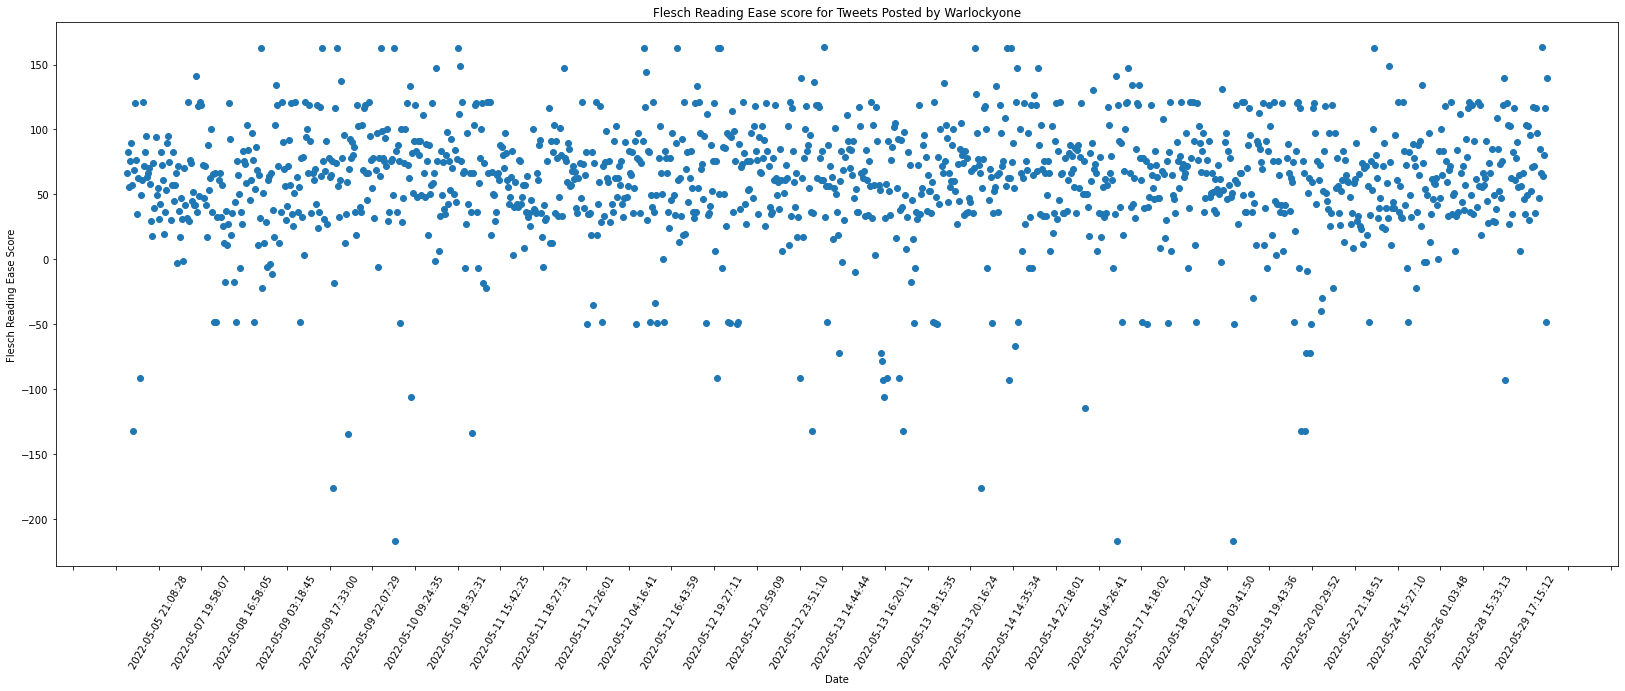

58.890751361357516

In [5]:
#Readability Scores for Warlocky 
import pandas as pd 
from datetime import datetime
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
stopwords = nltk.corpus.stopwords.words('english') 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
from nltk.tokenize import sent_tokenize

df = pd.read_csv('warlockynew.csv')


df['Text'] = df['Text'].str.split(n=1).str[1]

df['Text'] = df['Text'].astype(str)

Sentences_Count = []

for i in df['Text']: 
    
    Sentences_Count.append(len(sent_tokenize(i)))
    
df['Sentences_Count'] = Sentences_Count 

def syllable_count(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

Syllables_Count = []

for i in df['Text']: 
    
    Syllables_Count.append(syllable_count(i))
    
df['Syllables_Count'] = Syllables_Count 

df['#Text'] = df['Text'].apply(lambda n: len(n.split()))


Flesch_Score = []

num_words = df['#Text']

num_sents = df['Sentences_Count']

num_syllables = df['Syllables_Count']


for i in range(len(num_words)): 
    Flesch_Score.append(206.835 - 1.015 * (float(num_words[i]) / num_sents[i]) - 84.6 * (num_syllables[i] / float(num_words[i])))

df['Flesch_Score'] = Flesch_Score

df = df.iloc[::-1]

x = df['Timestamp'].values
y = df['Flesch_Score'].values

plt.subplots(figsize=(28, 10))

plt.scatter(x,y)



plt.title("Flesch Reading Ease score for Tweets Posted by Warlockyone")

plt.xlabel("Date")

plt.ylabel("Flesch Reading Ease Score")


plt.xticks(rotation=60)

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=40))

plt.show()

df['Flesch_Score'].mean()

In [77]:
#Create new file for SaltyProfessor Tweets without retweets  
import pandas as pd 
from datetime import datetime
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
stopwords = nltk.corpus.stopwords.words('english') 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter

df = pd.read_csv('SaltyProfessor.csv')

df['Timestamp'] = df['Timestamp'].astype(str)

df["Timestamp"] = df["Timestamp"].str[:-5]

df["Timestamp"] = df["Timestamp"].str.replace("T"," ")

df['Timestamp'] = df['Timestamp'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

d1 = datetime.strptime("2015-08-10 19:33:27.653", "%Y-%m-%d %H:%M:%S.%f")
tweet_time = datetime.strptime("2022-05-12 23:41:34.0", "%Y-%m-%d %H:%M:%S.%f")

posts = []

for i in df['Text']: 
    if(i[:2] != 'RT'): 
        posts.append(i)
    


df = df[~df.Text.str.contains("RT")]

df.to_csv('SaltyProfNew.csv', index=False)

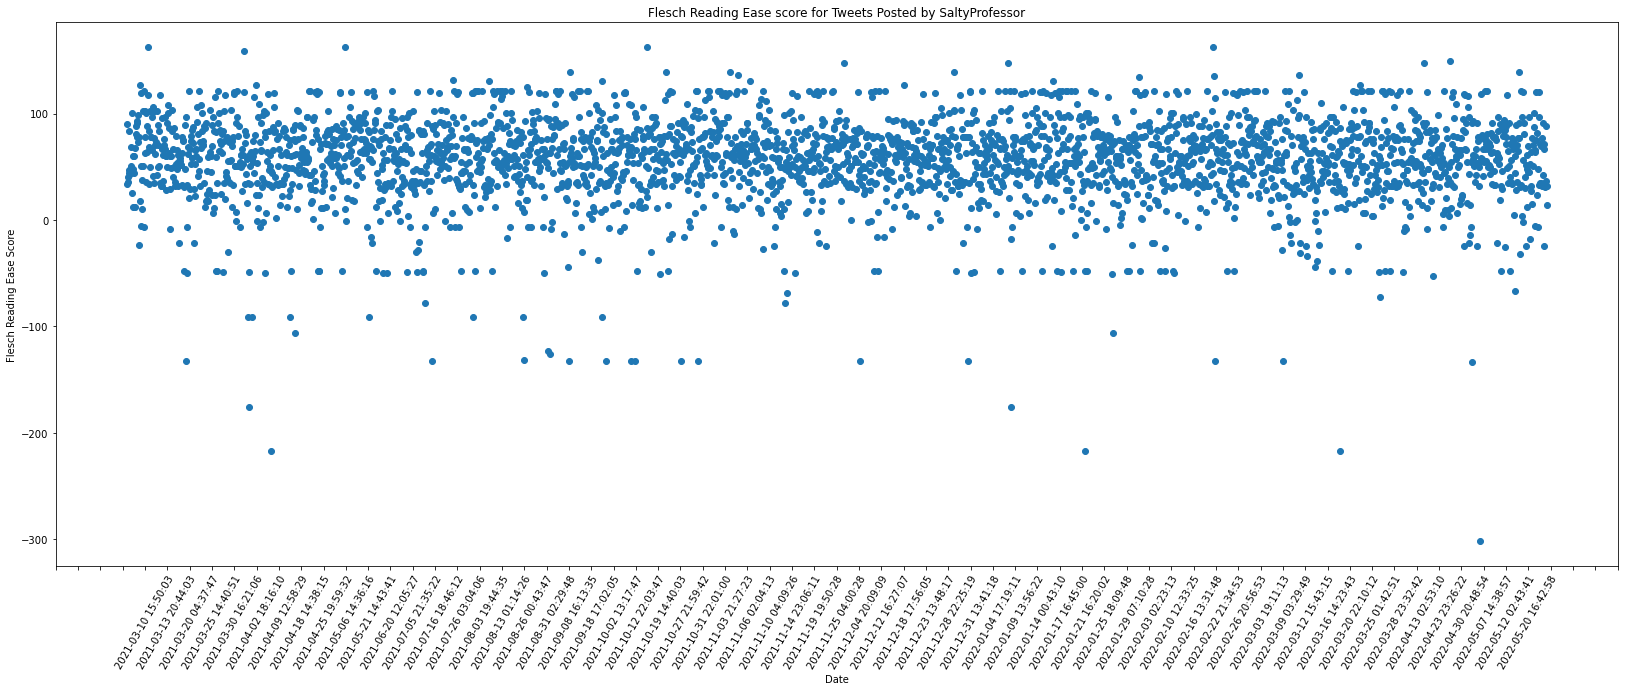

56.15428500397682

In [6]:
#Readability Scores for SaltyProf
import pandas as pd 
from datetime import datetime
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
stopwords = nltk.corpus.stopwords.words('english') 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
from nltk.tokenize import sent_tokenize

df = pd.read_csv('SaltyProfNew.csv')


df['Text'] = df['Text'].str.split(n=1).str[1]

df['Text'] = df['Text'].astype(str)

Sentences_Count = []

for i in df['Text']: 
    
    Sentences_Count.append(len(sent_tokenize(i)))
    
df['Sentences_Count'] = Sentences_Count 

def syllable_count(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

Syllables_Count = []

for i in df['Text']: 
    
    Syllables_Count.append(syllable_count(i))
    
df['Syllables_Count'] = Syllables_Count 

df['#Text'] = df['Text'].apply(lambda n: len(n.split()))


Flesch_Score = []

num_words = df['#Text']

num_sents = df['Sentences_Count']

num_syllables = df['Syllables_Count']


for i in range(len(num_words)): 
    Flesch_Score.append(206.835 - 1.015 * (float(num_words[i]) / num_sents[i]) - 84.6 * (num_syllables[i] / float(num_words[i])))

df['Flesch_Score'] = Flesch_Score

df = df.iloc[::-1]

x = df['Timestamp'].values
y = df['Flesch_Score'].values

plt.subplots(figsize=(28, 10))

plt.scatter(x,y)



plt.title("Flesch Reading Ease score for Tweets Posted by SaltyProfessor")

plt.xlabel("Date")

plt.ylabel("Flesch Reading Ease Score")


plt.xticks(rotation=60)

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))

plt.show()

df['Flesch_Score'].mean()